In [1]:
import glob
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

std_scaler=joblib.load('./preproc/stdscaler.bin')

def rescale_mean_temp(data):
    array = np.vstack((data, data, data, data, data)).T
    return std_scaler.inverse_transform(array)[:, -1]


def show_predictions(model_name):
    prev_n_days = ['2', '7', '30']
    categories = ['allfeatures', 'onlytempfeatures', 'wind']

    figure, axes = plt.subplots(1, 3, figsize=(30, 10))
    figure.suptitle(f'{model_name} model predictions', size=30)

    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlesize'] = 15
    plt.style.use('seaborn-darkgrid')

    for i, prev_n_day in enumerate(prev_n_days):
        axes[i].set_title(f'Previous {prev_n_day} days')
        ground_truth = np.load(f'./predictions/true_labels-{prev_n_day}-allfeatures.npy', allow_pickle=True)
        ground_truth = rescale_mean_temp(ground_truth)

        axes[i].scatter(range(len(ground_truth)), ground_truth, label=f'ground truth')
        
        for category in categories:
            predictions = np.load(f'./predictions/{model_name}/preds-prev{prev_n_day}-{category}.npy', allow_pickle=True)
            predictions = predictions

            mse = np.mean((predictions - ground_truth)**2)
            sse = np.sum((predictions - ground_truth)**2)
            sst = np.sum((ground_truth - np.mean(ground_truth))**2)
            r_square = 1 - (sse/sst)

            axes[i].scatter(range(len(predictions)),predictions, label=f'predictions {category}, $R^2$ = {round(r_square, 4)}')

        axes[i].legend(fontsize=12)


def get_results():
    models = ['linear_regression', 'random_forest', 'mlp']
    prev_n_days = ['2', '7', '30']
    categories = ['allfeatures', 'onlytempfeatures', 'wind']

    results = []
    for model in models:
        for i, prev_n_day in enumerate(prev_n_days):
            ground_truth = np.load(f'./predictions/true_labels-{prev_n_day}-allfeatures.npy', allow_pickle=True)
            ground_truth = rescale_mean_temp(ground_truth)
            
            for category in categories:
                predictions = np.load(f'./predictions/{model}/preds-prev{prev_n_day}-{category}.npy', allow_pickle=True)
                predictions = predictions

                mse = np.mean((predictions - ground_truth)**2)
                sse = np.sum((predictions - ground_truth)**2)
                sst = np.sum((ground_truth - np.mean(ground_truth))**2)
                r_square = 1 - (sse/sst)

                results.append([model, prev_n_day, category, mse, r_square, predictions])
    
    return pd.DataFrame.from_dict({'Model': [row[0] for row in results],
                                   'Previous days': [row[1] for row in results],
                                   'Used features': [row[2] for row in results],
                                   'MSE': [row[3] for row in results],
                                   'R^2': [row[4] for row in results],
                                   'Test Predictions': [row[5] for row in results]})

D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


# Results of models

In [2]:
results = get_results()
results['Previous days'] = pd.to_numeric(results['Previous days'])
results.sort_values(by=['R^2'], ascending=False, inplace=True)
results

,Model,Previous days,Used features,MSE,R^2,Test Predictions
3,linear_regression,7,allfeatures,2.999537,0.959935,"[10.866990169122257, 10.44356800053233, 11.728..."
6,linear_regression,30,allfeatures,3.211126,0.959412,"[8.882212886793525, 9.34688955584225, 10.53813..."
0,linear_regression,2,allfeatures,3.110481,0.957947,"[13.709189284245417, 12.269083000083983, 10.15..."
7,linear_regression,30,onlytempfeatures,3.373652,0.957358,"[8.474364108034916, 9.332980401685068, 9.71520..."
4,linear_regression,7,onlytempfeatures,3.251213,0.956574,"[10.893312391314863, 10.10751016008087, 11.149..."
22,mlp,7,onlytempfeatures,3.439593,0.954058,"[10.478802, 10.886008, 10.327455, 12.405914, 1..."
1,linear_regression,2,onlytempfeatures,3.444163,0.953435,"[13.836651635364525, 12.11797652944059, 9.9166..."
15,random_forest,30,allfeatures,3.707371,0.953139,"[9.808, 9.403000000000002, 9.4495, 9.6815, 9.7..."
19,mlp,2,onlytempfeatures,3.497839,0.952710,"[13.280412, 12.4759655, 10.248391, 11.886305, ..."
12,random_forest,7,allfeatures,3.595812,0.951971,"[11.433, 10.9055, 12.026, 12.182500000000001, ..."


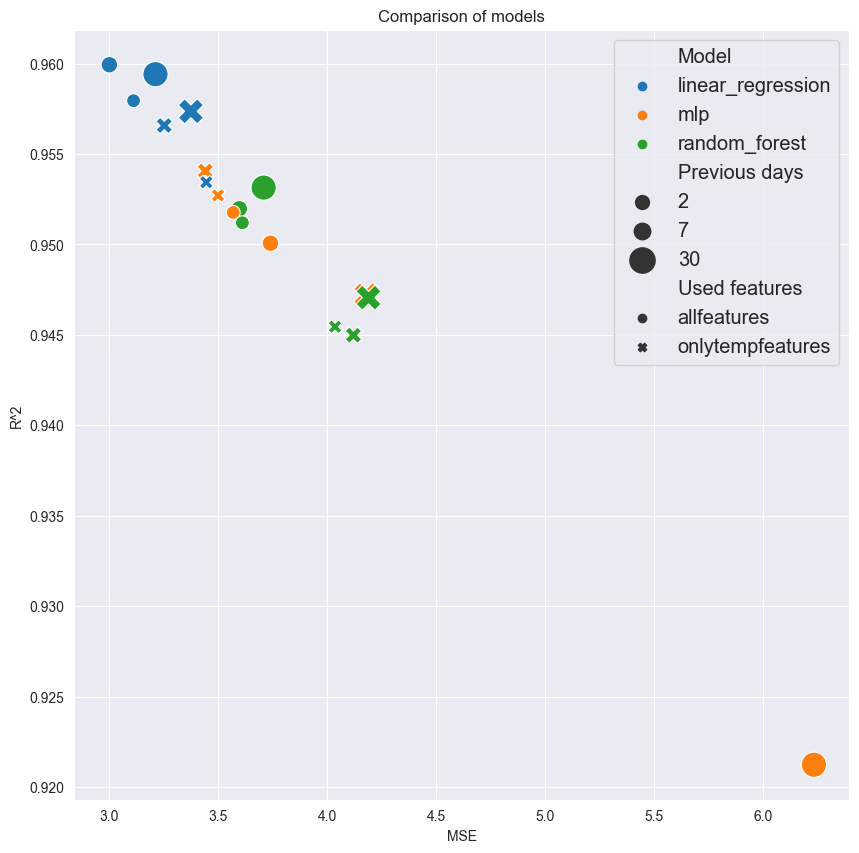

In [3]:
results_without_wind = results[results['Used features'] != 'wind']

sns.set_style(style='darkgrid')
figure, ax = plt.subplots(figsize=(10,10))
ax.set_title('Comparison of models')
sns.scatterplot(data=results_without_wind, x='MSE', y='R^2', hue='Model', size='Previous days', sizes=(100, 330), style='Used features', ax=ax)
plt.legend(fontsize='x-large')

# Linear regression

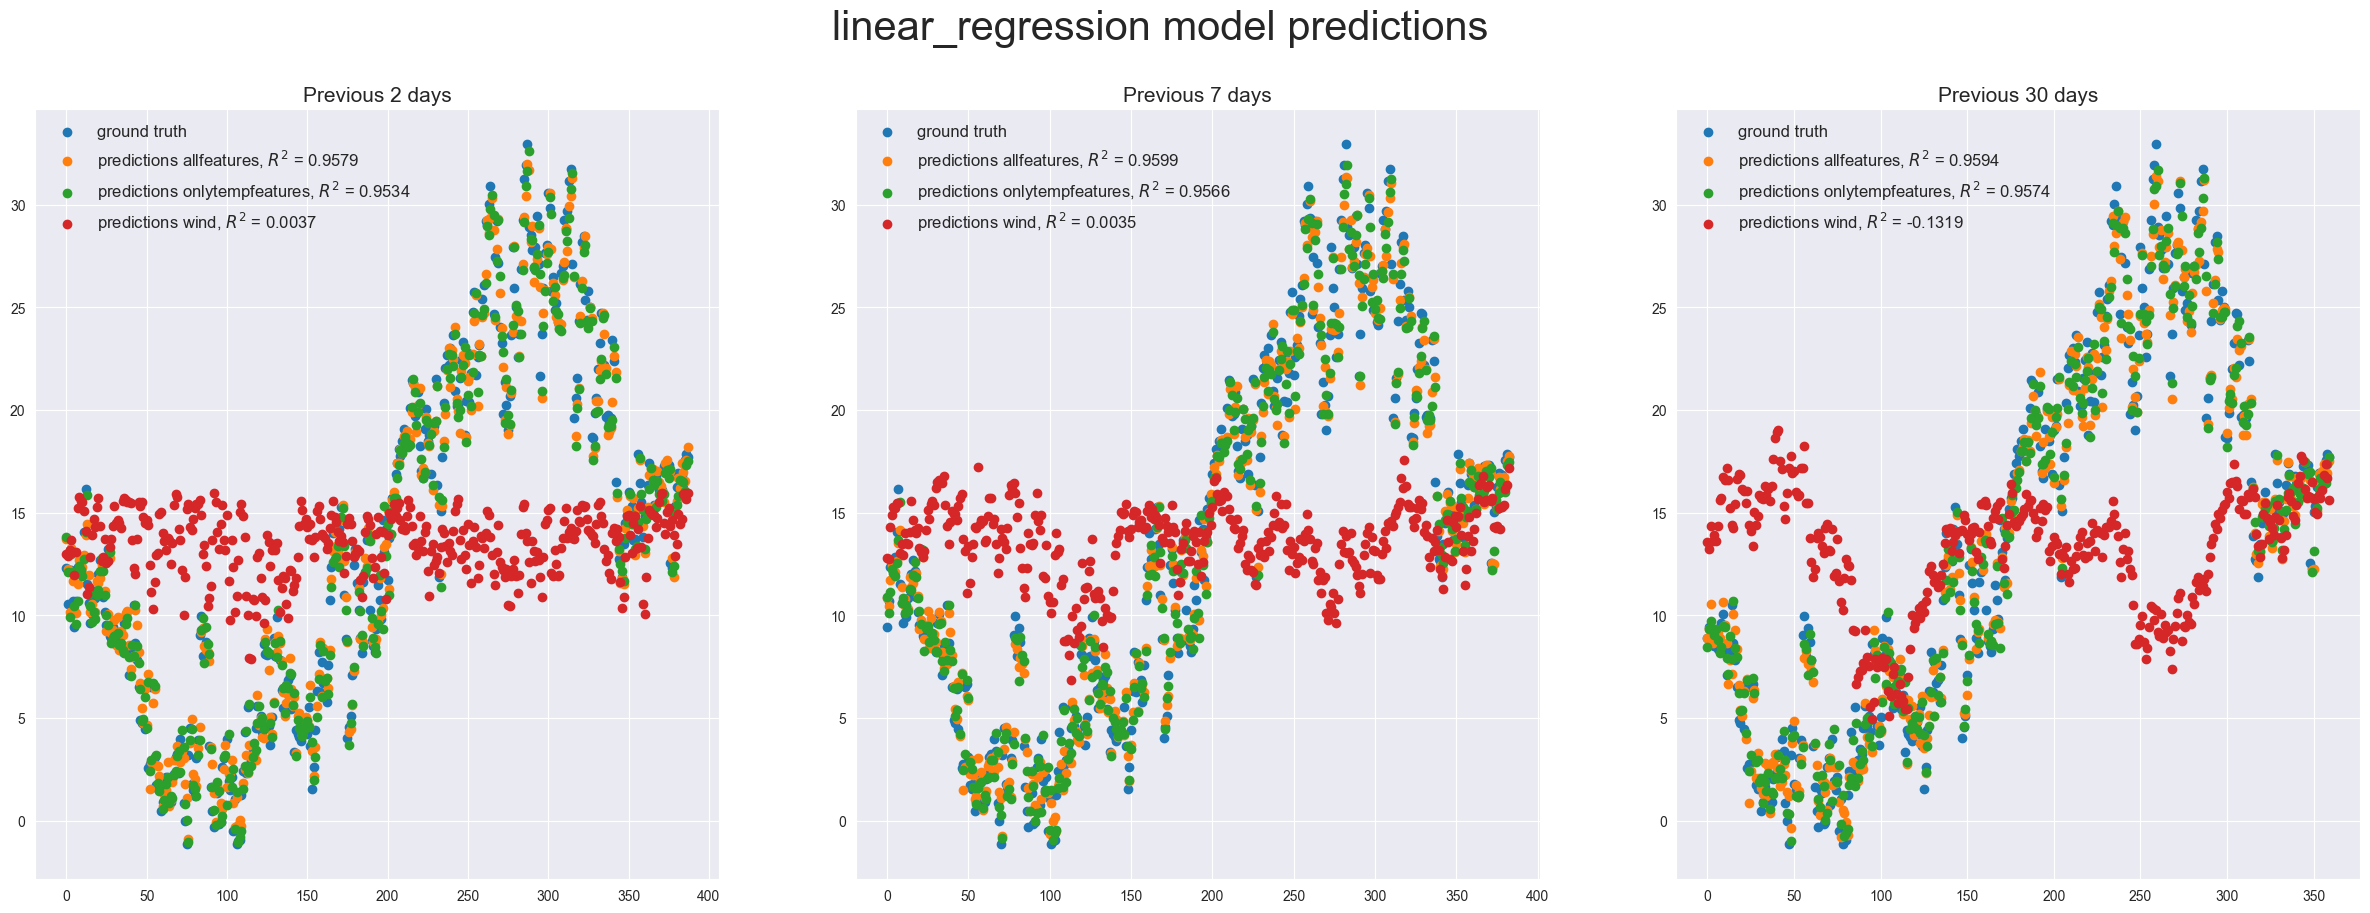

In [4]:
show_predictions('linear_regression')

# Random forest

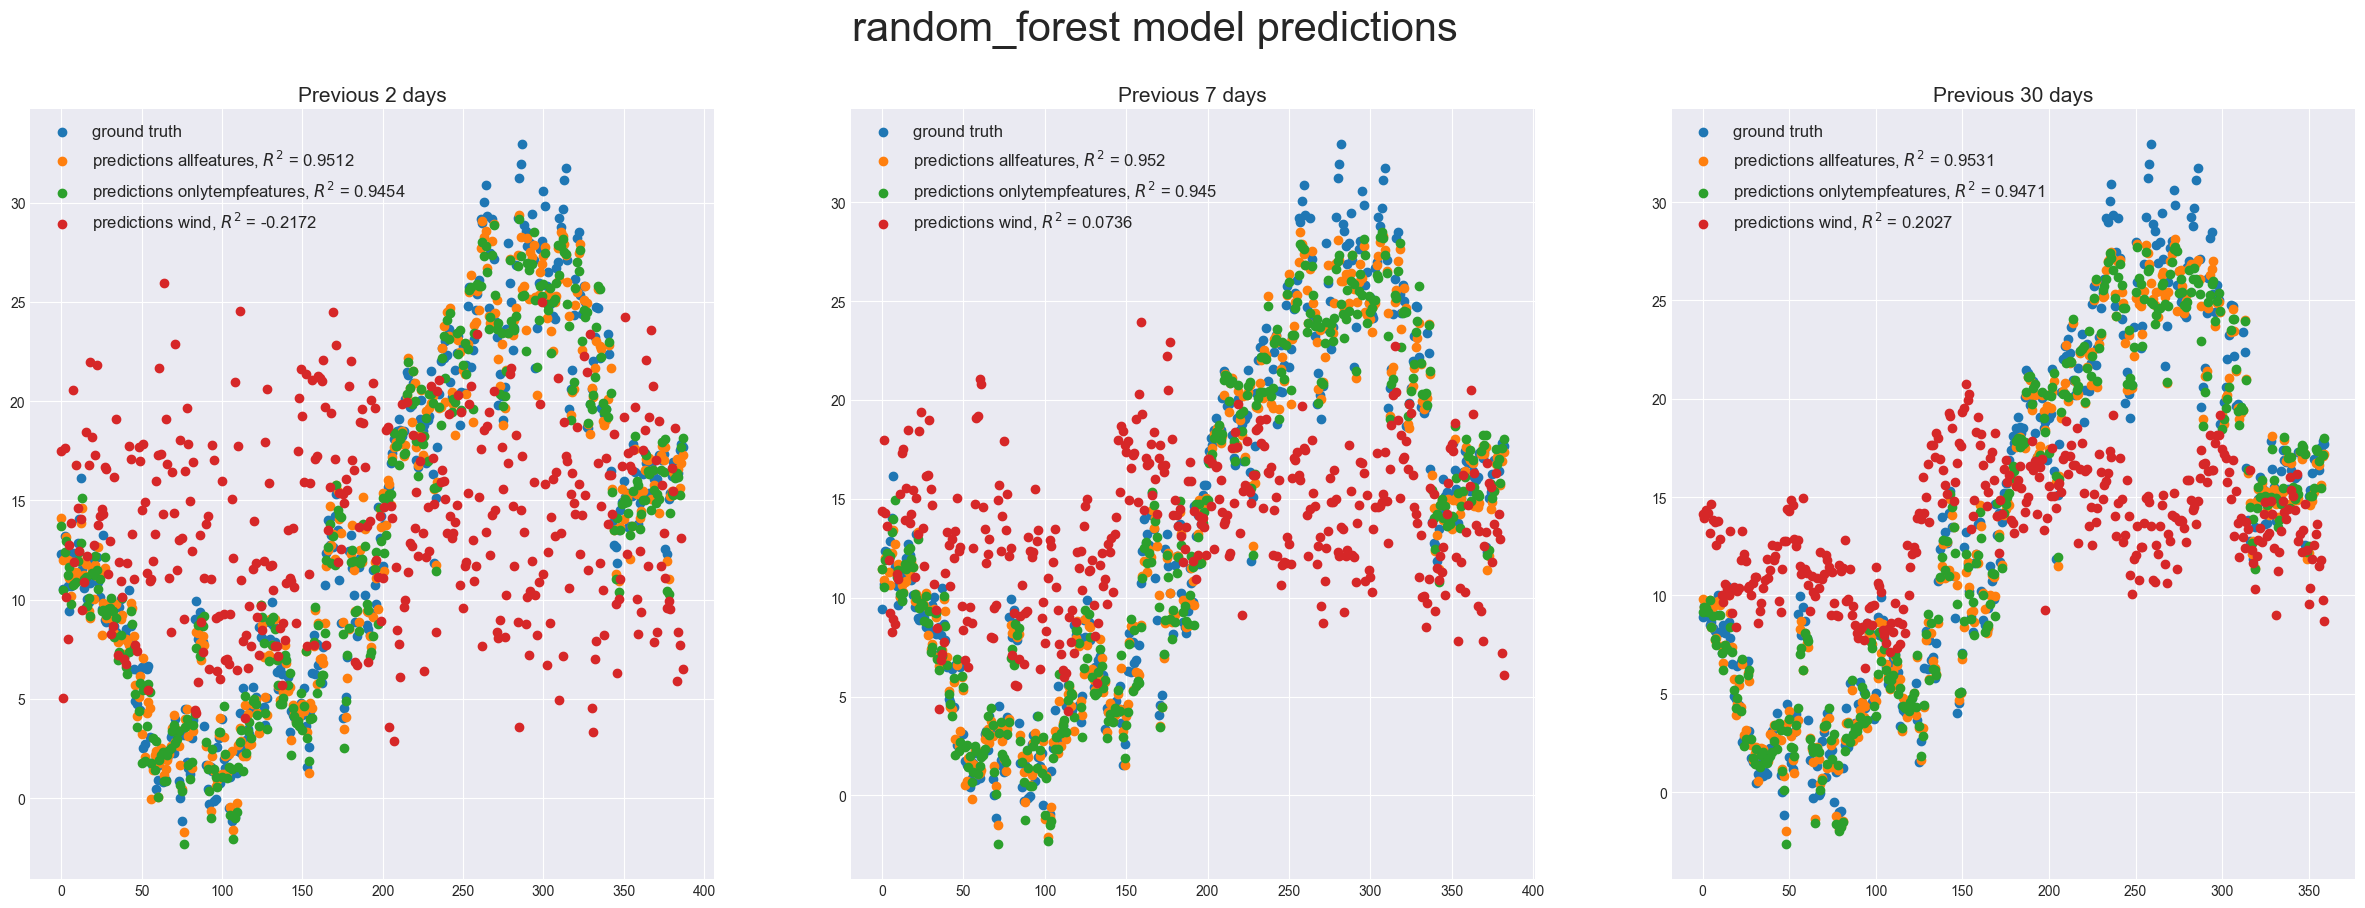

In [5]:
show_predictions('random_forest')

# Multilayer perceptron

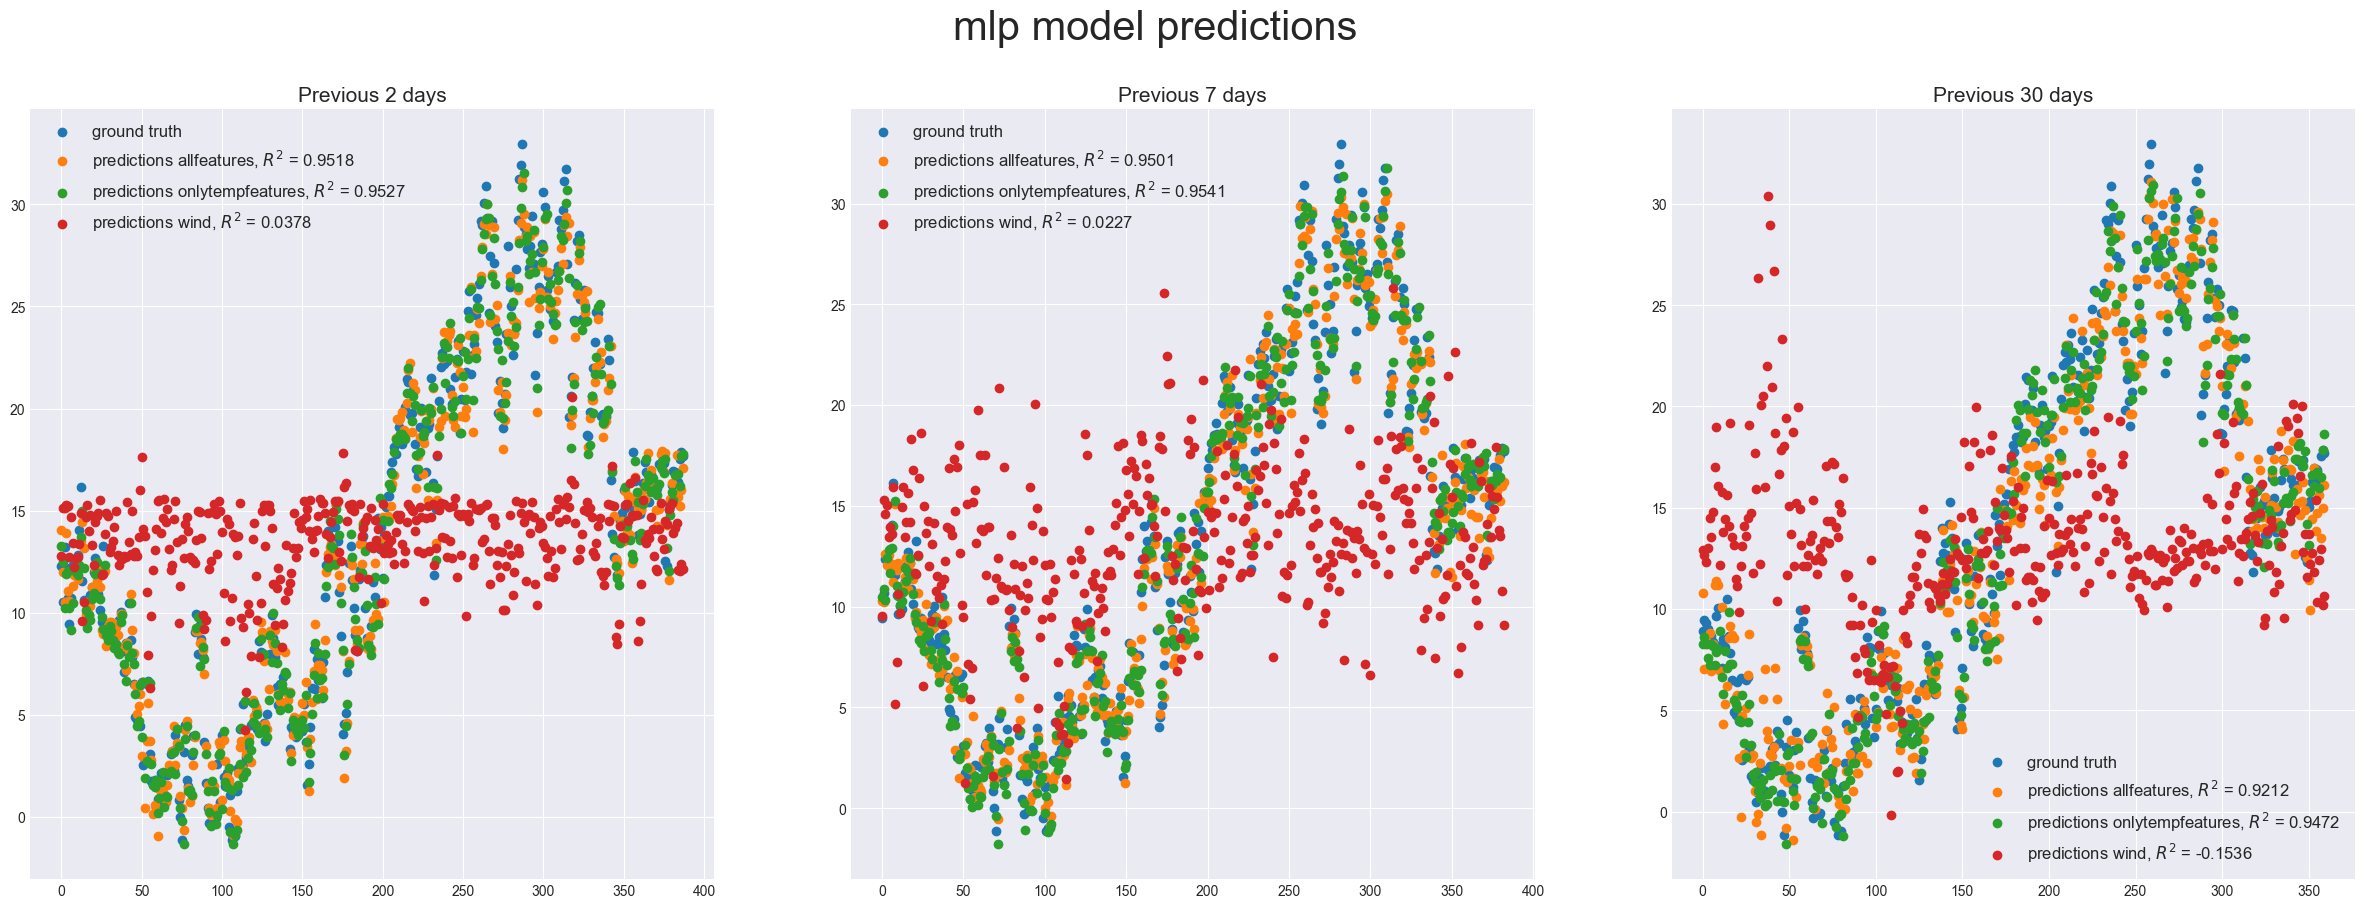

In [6]:
show_predictions('mlp')

# Bias and Variance

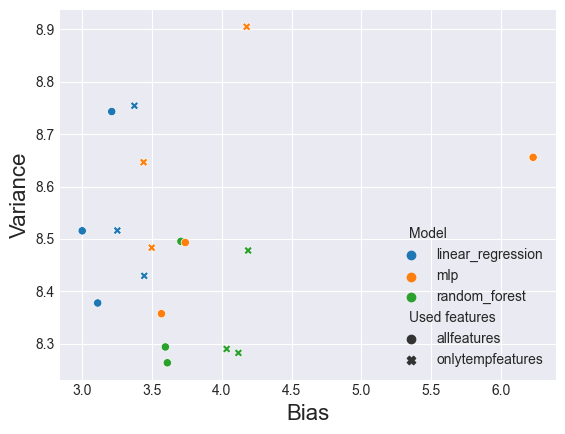

In [110]:
results['var'] = results['Test Predictions'].apply(lambda array : np.std(array))
sns.scatterplot(data=results[results['Used features'] != 'wind'], x="MSE", y="var", style="Used features", hue="Model")
plt.ylabel('Variance',fontsize=16)
plt.xlabel('Bias',fontsize=16);

# Model and used features comparison

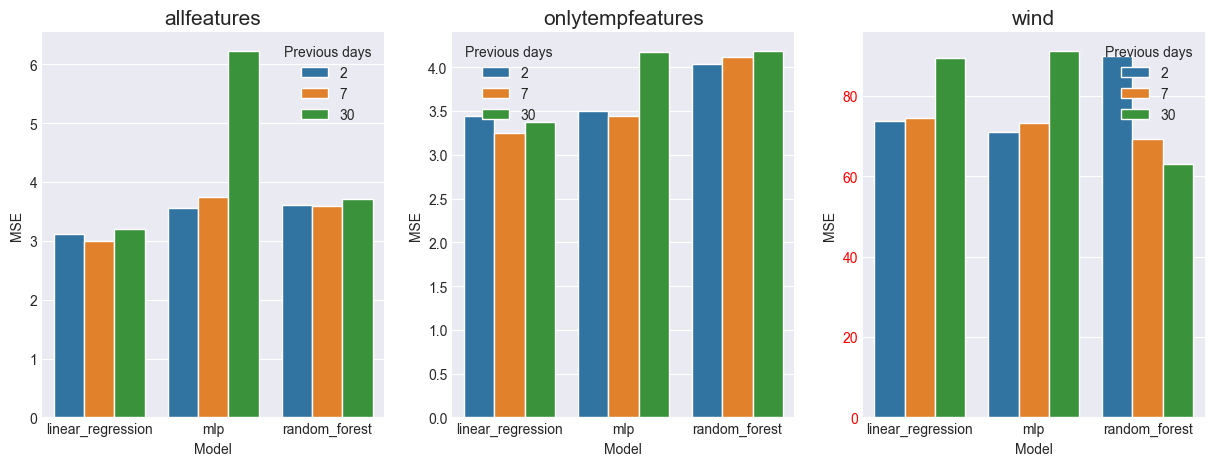

In [40]:
fig,axes = plt.subplots(ncols=3,figsize=(15,5))

for idx, features in enumerate(results['Used features'].drop_duplicates().values):
    sns.barplot(data=results[results['Used features']==features].sort_values("Model"), x="Model", y= "MSE", hue="Previous days", ax = axes[idx])
    axes[idx].set_title(features)

    if features == "wind": #to highlight the difference in scale
        axes[idx].tick_params(axis='y', colors='red')


# Errors through time

D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\ipykernel_launcher.py:58: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


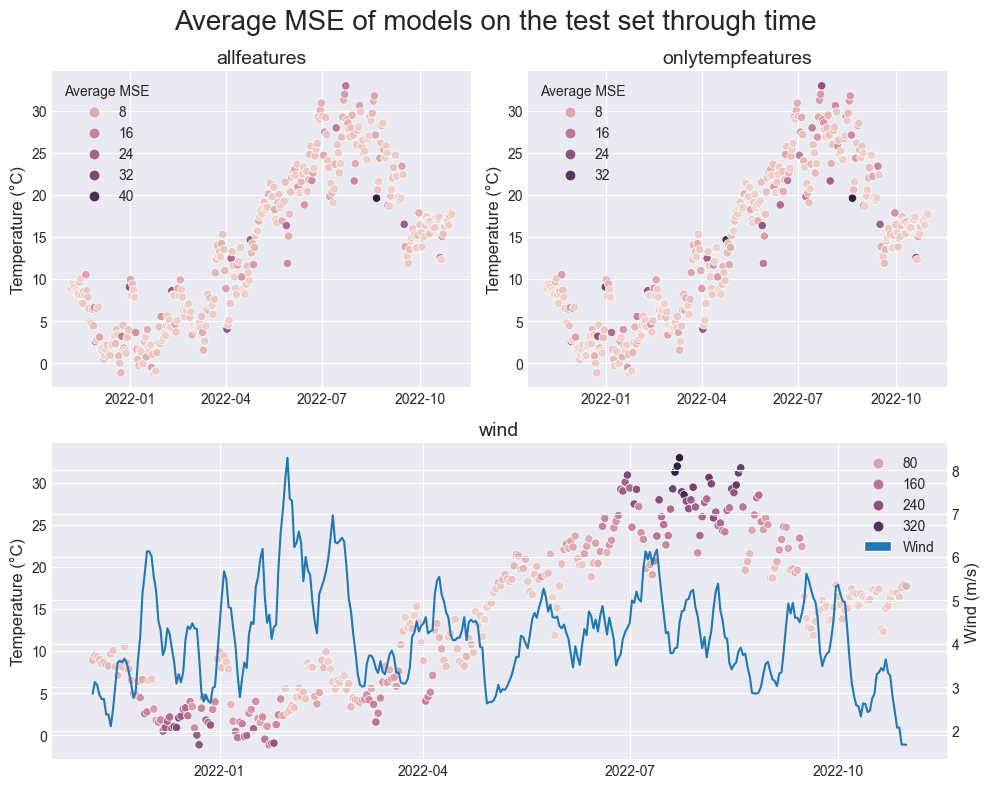

In [181]:
import matplotlib.dates as md
import matplotlib.patches as mpatches

y_true = pd.read_csv('./data/test_data.csv')
y_true['target'] = (y_true['Max temperature (°C)'] + y_true['Min temperature (°C)']) / 2
y_true['Date'] =pd.to_datetime(y_true['Date'])
gs_kw = dict(width_ratios=[1, 1], height_ratios=[1, 1])

subplot_keys = ['A']

fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower', 'lower']],
                              gridspec_kw=gs_kw, figsize=(10, 8),
                              layout="constrained")
for idx, mosaic_name in enumerate(['upper left','upper right','lower']):

    features = results['Used features'].drop_duplicates().sort_values().values[idx]

    ax = axd[mosaic_name]

    truncated_test_set = []
    #because of different window sizes only the last 360 days are mutual test sets
    results[results["Used features"]==features]['Test Predictions'].apply(lambda array: truncated_test_set.append(array[-360:]))
    pred_matrix = np.array(truncated_test_set)

    mse_on_days = (pred_matrix - y_true['target'].values[-360:])**2
    average_mse_on_days = np.mean((pred_matrix - y_true['target'].values[-360:])**2,axis=0)

    avg_error_on_day = results

    scatter = sns.scatterplot(y_true[-360:],x = 'Date', y='target', ax= ax,hue=average_mse_on_days)
    ax.xaxis.set_major_locator(md.MonthLocator(range(1,13,3)))

    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))
    ax.set_title(features,fontsize=14)
    ax.set_ylabel('Temperature (°C)',fontsize=12)
    ax.set_xlabel('')
    ax.legend(title='Average MSE')

    if features=='wind':
        twin_x = ax.twinx()
        y_true['smoothed_wind'] = y_true['Wind (m/s)'].iloc[-360:].rolling(7,center=True,min_periods=1).mean()
        tmp = sns.lineplot(data=y_true, x="Date", y="smoothed_wind",ax=twin_x)
        twin_x.set_ylabel('Wind (m/s)',fontsize=12)

        legend = ax.get_legend()

        handles, labels = ax.get_legend_handles_labels()
        handles.append(mpatches.Patch(facecolor=tmp.lines[0].get_color(),linestyle='-'))
        labels.append("Wind")

        legend._legend_box = None
        legend._init_legend_box(handles, labels)
        legend._set_loc(legend._loc)
        legend.set_title(legend.get_title().get_text())

plt.suptitle('Average MSE of models on the test set through time',fontsize=20)
plt.tight_layout()